In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import numpy as np
import seaborn as sns

In [10]:
data =pd.read_csv("Titanic-Dataset.csv")

In [11]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [12]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [13]:
data.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [14]:
data.dropna(subset="Age", inplace=True)

In [15]:
data.dropna(subset="Embarked", inplace=True)

In [16]:
data.drop(["Cabin"], inplace=True, axis=1)

In [17]:
data.drop(["Name", "Ticket"], inplace=True, axis=1)

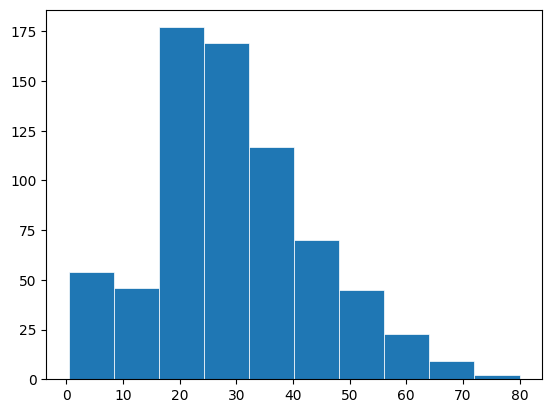

In [18]:
# plot:
fig, ax = plt.subplots()

ax.hist(data["Age"], bins=10, linewidth=0.5, edgecolor="white")

plt.show()

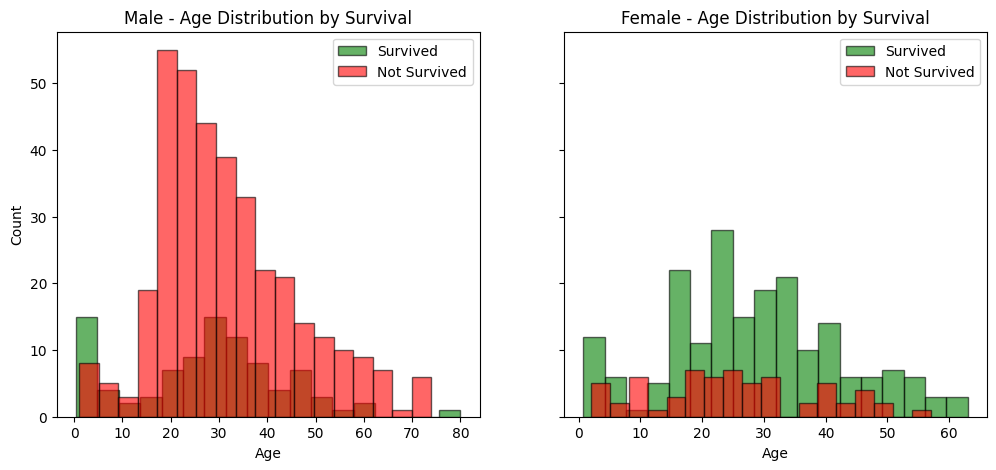

In [19]:
# Plot Histogram
# Create a figure with two subplots (one for each sex)
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

# Plot for Male
axes[0].hist(data[(data['Sex'] == 'male') & (data['Survived'] == 1)]['Age'], bins=18, alpha=0.6, color='green', edgecolor='black', label="Survived")
axes[0].hist(data[(data['Sex'] == 'male') & (data['Survived'] == 0)]['Age'], bins=18, alpha=0.6, color='red', edgecolor='black', label="Not Survived")
axes[0].set_title("Male - Age Distribution by Survival")
axes[0].set_xlabel("Age")
axes[0].set_ylabel("Count")
axes[0].legend()

# Plot for Female
axes[1].hist(data[(data['Sex'] == 'female') & (data['Survived'] == 1)]['Age'], bins=18, alpha=0.6, color='green', edgecolor='black', label="Survived")
axes[1].hist(data[(data['Sex'] == 'female') & (data['Survived'] == 0)]['Age'], bins=18, alpha=0.6, color='red', edgecolor='black', label="Not Survived")
axes[1].set_title("Female - Age Distribution by Survival")
axes[1].set_xlabel("Age")
axes[1].legend()

# Show the plot
plt.show()

In [20]:
# Encoding categorical data, converting object to numerical format
encoder=LabelEncoder()
data['Sex'] = encoder.fit_transform(data['Sex'])
data['Embarked'] = encoder.fit_transform(data['Embarked'])
data.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,2
1,2,1,1,0,38.0,1,0,71.2833,0
2,3,1,3,0,26.0,0,0,7.9250,2
3,4,1,1,0,35.0,1,0,53.1000,2
4,5,0,3,1,35.0,0,0,8.0500,2
6,7,0,1,1,54.0,0,0,51.8625,2
7,8,0,3,1,2.0,3,1,21.0750,2
8,9,1,3,0,27.0,0,2,11.1333,2
9,10,1,2,0,14.0,1,0,30.0708,0
10,11,1,3,0,4.0,1,1,16.7000,2


In [21]:
survival_table = pd.crosstab(data['Pclass'], data['Survived'], normalize='index') * 100
survival_table.rename(columns={0: 'Died(%)', 1: 'Survived(%)'}, inplace=True)
print(survival_table)


Survived    Died(%)  Survived(%)
Pclass                          
1         34.782609    65.217391
2         52.023121    47.976879
3         76.056338    23.943662


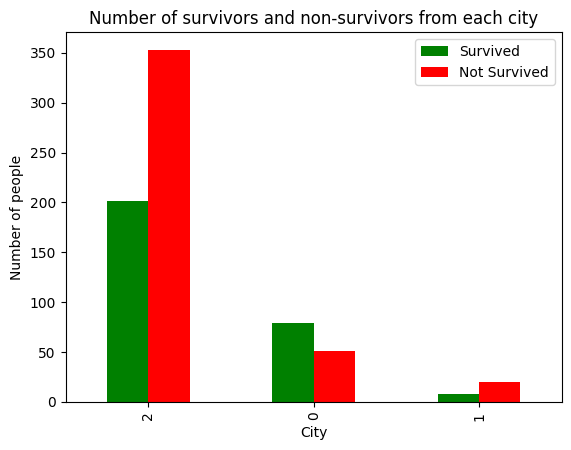

In [23]:
survivors = data[data['Survived'] == 1]['Embarked'].value_counts()
non_survivors = data[data['Survived'] == 0]['Embarked'].value_counts()

plot_df = pd.DataFrame({'Survived': survivors, 'Not Survived': non_survivors})

plot_df.plot(kind='bar', stacked=False, color=['g', 'r'])

plt.xlabel('City')
plt.ylabel('Number of people')
plt.title('Number of survivors and non-survivors from each city')

plt.show()

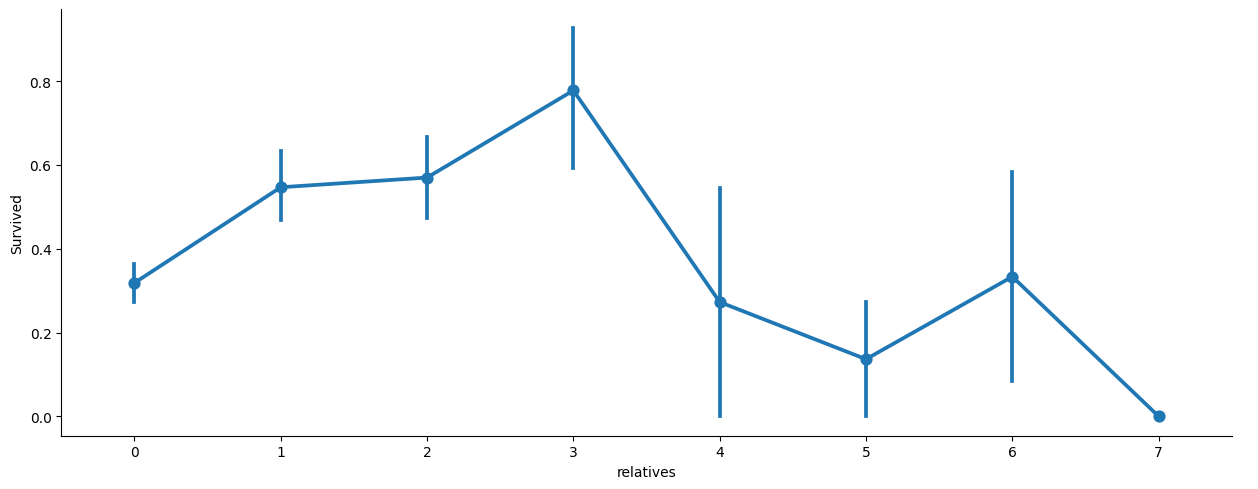

In [24]:
data['relatives'] = data['SibSp'] + data['Parch']

axes = sns.catplot(x='relatives', y='Survived', data=data, aspect=2.5, kind='point')
plt.show()

# Model Implementation

### Calculate Enthropy for entire dataset

In [26]:
def calculate_entropy(column):
    """
    Manually compute entropy for a categorical column.#Model Implementation
    """
    value_counts = column.value_counts()  # Count occurrences of each category
    total_count = len(column)  # Total number of values

    entropy_value = 0
    for count in value_counts:
        probability = count / total_count  # Compute probability p(x)
        entropy_value += -probability * np.log2(probability)  # Apply entropy formula

    return entropy_value



In [38]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(data, test_size=0.2, random_state=42)
train_entropy = calculate_entropy(train['Survived'])
print(f"Entropy of the 'Survived' column in Training Data: {train_entropy}")

Entropy of the 'Survived' column in Training Data: 0.96821481833232


### Function to calculate information gain for categorical data

In [ ]:
def information_gain(attribute_name):
    """
    Calculate the information gain for a given categorical attribute.
    """
    train_entropy=calculate_entropy(train['Survived'])
    total_count=len(attribute_name)
    entropy_of_attribute_given_value=0

    for value in attribute_name.unique():
        subset=train[train[attribute_name]==value] #subset of data where attribute's value is unique
        entropy_value=calculate_entropy(subset['Survived']) if len(subset)>0 else 0  #compute entropy of survival in subset if it's not empty, else 0 for that subset. Then multiply it by its probability.
        weight=len(subset)/total_count
        entropy_of_attribute_given_value+=entropy_value*weight
    information_gain=train_entropy-entropy_of_attribute_given_value
    print(f"Information gain for attribute  {information_gain}")
    return information_gain
    

In [48]:
information_gain('Pclass')

AttributeError: 'str' object has no attribute 'unique_values'

In [44]:
def information_gain(df, attribute_name):
    """
    Calculate the information gain for a given categorical attribute.
    """
    # 🔹 Step 1: Compute Entropy of the entire dataset (before split)
    train_entropy = calculate_entropy(df['Survived'])

    # 🔹 Step 2: Compute Weighted Entropy After Splitting by Attribute
    total_count = len(df)
    entropy_after_split = 0

    for value in df[attribute_name].unique():  # Iterate over unique values (not counts!)
        subset = df[df[attribute_name] == value]  # Subset where attribute == value
        subset_entropy = calculate_entropy(subset['Survived']) if len(subset) > 0 else 0  
        weight = len(subset) / total_count  # Compute weight of subset
        entropy_after_split += weight * subset_entropy  # Weighted sum

    # 🔹 Step 3: Compute Information Gain
    info_gain = train_entropy - entropy_after_split

    print(f"Information Gain for '{attribute_name}': {info_gain:.4f}")
    return info_gain


In [45]:
information_gain(train, 'Pclass')


Information Gain for 'Pclass': 0.1026


0.10259281598240744